In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Recurrent Neural Network - LSTMs

## Part 1 - Data Preprocessing

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

### Importing the training set

In [3]:
dataset_train = pd.read_csv('/content/drive/MyDrive/DSs/TimeSeries_DS_1/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [4]:
dataset_train.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [5]:
dataset_train.shape, training_set.shape

((1258, 6), (1258, 1))

In [6]:
training_set[: 3]

array([[325.25],
       [331.27],
       [329.83]])

### Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [8]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [11]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 200, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 200, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 200))
regressor.add(Dropout(0.2))

### Adding the output layer

In [16]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [18]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 33s 678ms/step - loss: 0.0330
Epoch 2/100
38/38 [==============================] - 25s 668ms/step - loss: 0.0036
Epoch 3/100
38/38 [==============================] - 25s 667ms/step - loss: 0.0036
Epoch 4/100
38/38 [==============================] - 25s 668ms/step - loss: 0.0028
Epoch 5/100
38/38 [==============================] - 25s 670ms/step - loss: 0.0029
Epoch 6/100
38/38 [==============================] - 25s 668ms/step - loss: 0.0026
Epoch 7/100
38/38 [==============================] - 25s 668ms/step - loss: 0.0022
Epoch 8/100
38/38 [==============================] - 26s 672ms/step - loss: 0.0026
Epoch 9/100
38/38 [==============================] - 25s 666ms/step - loss: 0.0029
Epoch 10/100
38/38 [==============================] - 25s 664ms/step - loss: 0.0032
Epoch 11/100
38/38 [==============================] - 25s 668ms/step - loss: 0.0023
Epoch 12/100
38/38 [==============================] - 25s 668ms/step - loss: 0.0025
E

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [29]:
dataset_test = pd.read_csv('/content/drive/MyDrive/DSs/TimeSeries_DS_1/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [30]:
dataset_test.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"


In [31]:
real_stock_price[: 3]

array([[778.81],
       [788.36],
       [786.08]])

### Getting the predicted stock price of 2017

In [32]:
dataset_test.shape

(20, 6)

In [33]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

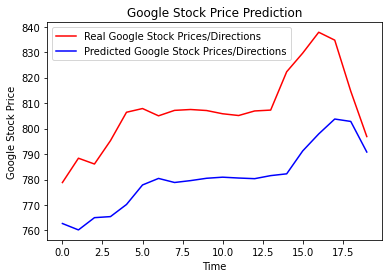

In [39]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Prices/Directions')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Prices/Directions')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()